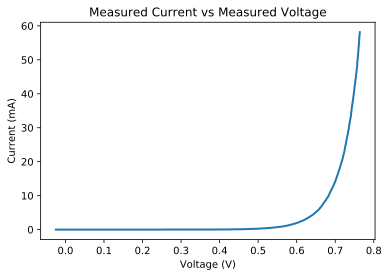

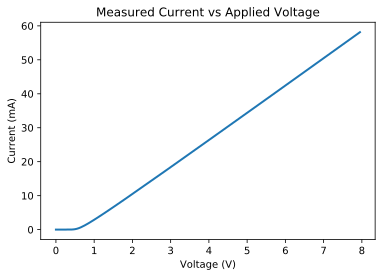

In [2]:
from IPython.display import display, HTML
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

f =  open("lab4_cp2.npz", "rb")
npzfile = np.load(f)
output_voltage = np.array(npzfile['arr_0'])
measured_voltage = np.array(npzfile['arr_1'])
measured_current = np.array(npzfile['arr_2'])
f.close()
output_voltage = output_voltage.astype(np.float64)
measured_voltage = measured_voltage.astype(np.float64)
measured_current = measured_current.astype(np.float64)*1000

plt.figure()
plt.plot(measured_voltage, measured_current, linewidth=2.0)
plt.title("Measured Current vs Measured Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (mA)")
plt.show()

plt.figure()
plt.plot(output_voltage, measured_current, linewidth=2.0)
plt.title("Measured Current vs Applied Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (mA)")
plt.show()

In [18]:
"""
LAB 4 CHECKOINT 1 DATA COLLECTION
"""

# NOTE 1
# If your power supply goes into an error state (i.e., the word
# error is printed on the front of the device), use this command
# power_supply.write("*CLS")
# to clear the error so that you can rerun your code. The supply
# typically beeps after an error has occured.

import visa
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
mpl.style.use('ggplot')

#%%
# This section of the code cycles through all USB connected devices to the computer.
# The code figures out the USB port number for each instrument.
# The port number for each instrument is stored in a variable named “instrument_id”
# If the instrument is turned off or if you are trying to connect to the 
# keyboard or mouse, you will get a message that you cannot connect on that port.
device_manager = visa.ResourceManager()
devices = device_manager.list_resources()
number_of_device = len(devices)

power_supply_id = -1;
waveform_generator_id = -1;
digital_multimeter_id = -1;
oscilloscope_id = -1;

# assumes only the DC power supply is connected
for i in range (0, number_of_device):

# check that it is actually the power supply
    try:
        device_temp = device_manager.open_resource(devices[i])
        print("Instrument connect on USB port number [" + str(i) + "] is " + device_temp.query("*IDN?"))
        if (device_temp.query("*IDN?") == 'HEWLETT-PACKARD,E3631A,0,3.2-6.0-2.0\r\n'):
            power_supply_id = i        
        if (device_temp.query("*IDN?") == 'HEWLETT-PACKARD,E3631A,0,3.0-6.0-2.0\r\n'):
            power_supply_id = i
        if (device_temp.query("*IDN?") == 'Agilent Technologies,33511B,MY52301259,3.03-1.19-2.00-52-00\n'):
            waveform_generator_id = i
        if (device_temp.query("*IDN?") == 'Agilent Technologies,34461A,MY53207926,A.01.10-02.25-01.10-00.35-01-01\n'):
            digital_multimeter_id = i 
        if (device_temp.query("*IDN?") == 'Keysight Technologies,34461A,MY53212931,A.02.08-02.37-02.08-00.49-01-01\n'):
            digital_multimeter_id = i            
        if (device_temp.query("*IDN?") == 'KEYSIGHT TECHNOLOGIES,MSO-X 3024T,MY54440281,07.10.2017042905\n'):
            oscilloscope_id = i                        
        device_temp.close()
    except:
        print("Instrument on USB port number [" + str(i) + "] cannot be connected. The instrument might be powered of or you are trying to connect to a mouse or keyboard.\n")
    

#%%
# Open the USB communication port with the power supply.
# The power supply is connected on USB port number power_supply_id.
# If the power supply ss not connected or turned off, the program will exit.
# Otherwise, the power_supply variable is the handler to the power supply
    
if (power_supply_id == -1):
    print("Power supply instrument is not powered on or connected to the PC.")    
else:
    print("Power supply is connected to the PC.")
    power_supply = device_manager.open_resource(devices[power_supply_id]) 
    
#%%
# The power supply output voltage will be swept from 0 to 1.5V in steps of 0.05V.
# This voltage will be applied on the 6V output ports.
# For each voltage applied on the 6V power supply, we will measure the actual 
# voltage and current supplied by the power supply.
# If your circuit operates correctly, the applied and measured voltage will be the same.
# If the power supply reaches its maximum allowed current, 
# then the applied voltage will not be the same as the measured voltage.

    output_voltage = np.arange(0, 8, 0.1)
    measured_voltage = np.array([]) # create an empty list to hold our values
    measured_current = np.array([]) # create an empty list to hold our values

    print(power_supply.write("OUTPUT ON")) # power supply output is turned on

    # loop through the different voltages we will apply to the power supply
    # For each voltage applied on the power supply, 
    # measure the voltage and current supplied by the 6V power supply
    for v in output_voltage:
        # apply the desired voltage on teh 6V power supply and limist the output current to 0.5A
        power_supply.write("APPLy P25V, %0.2f, 0.06" % v)
    
        # pause 50ms to let things settle
        time.sleep(0.75)
    
        # read the output voltage on the 6V power supply
        measured_voltage_tmp = power_supply.query("MEASure:VOLTage:DC? P25V")
        measured_voltage = np.append(measured_voltage, measured_voltage_tmp)

        # read the output current on the 6V power supply
        measured_current_tmp = power_supply.query("MEASure:CURRent:DC? P25V")
        measured_current = np.append(measured_current, measured_current_tmp)

    # power supply output is turned off
    print(power_supply.write("OUTPUT OFF"))

    # close the power supply USB handler.
    # Otherwise you cannot connect to it in the future
    power_supply.close()

#%%    
    print("Saving output to file.")
    f = open("lab4_cp1.npz", "wb")
    np.savez(f, output_voltage, measured_voltage, measured_current)
    f.close()


Instrument on USB port number [0] cannot be connected. The instrument might be powered of or you are trying to connect to a mouse or keyboard.

Instrument on USB port number [1] cannot be connected. The instrument might be powered of or you are trying to connect to a mouse or keyboard.

Instrument on USB port number [2] cannot be connected. The instrument might be powered of or you are trying to connect to a mouse or keyboard.

Instrument on USB port number [3] cannot be connected. The instrument might be powered of or you are trying to connect to a mouse or keyboard.

Instrument connect on USB port number [4] is HEWLETT-PACKARD,E3631A,0,3.0-6.0-2.0

Power supply is connected to the PC.
(11, <StatusCode.success: 0>)
(12, <StatusCode.success: 0>)
Saving output to file.


In [ ]:
"""
LAB 4 CHECKPOINT 2 DATA CREATION
"""

import visa
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
mpl.style.use('ggplot')

#%%
# This section of the code cycles through all USB connected devices to the computer.
# The code figures out the USB port number for each instrument.
# The port number for each instrument is stored in a variable named “instrument_id”
# If the instrument is turned off or if you are trying to connect to the 
# keyboard or mouse, you will get a message that you cannot connect on that port.
device_manager = visa.ResourceManager()
devices = device_manager.list_resources()
number_of_device = len(devices)

power_supply_id = -1;
waveform_generator_id = -1;
digital_multimeter_id = -1;
oscilloscope_id = -1;

# assumes only the DC power supply is connected
for i in range (0, number_of_device):

# check that it is actually the power supply
    try:
        device_temp = device_manager.open_resource(devices[i])
        print("Instrument connect on USB port number [" + str(i) + "] is " + device_temp.query("*IDN?"))
        if (device_temp.query("*IDN?") == 'HEWLETT-PACKARD,E3631A,0,3.2-6.0-2.0\r\n'):
            power_supply_id = i        
        if (device_temp.query("*IDN?") == 'HEWLETT-PACKARD,E3631A,0,3.0-6.0-2.0\r\n'):
            power_supply_id = i
        if (device_temp.query("*IDN?") == 'Agilent Technologies,33511B,MY52301259,3.03-1.19-2.00-52-00\n'):
            waveform_generator_id = i
        if (device_temp.query("*IDN?") == 'Agilent Technologies,34461A,MY53208035,A.01.10-02.25-01.10-00.35-01-01\n'):
            digital_multimeter_id = i 
        if (device_temp.query("*IDN?") == 'Keysight Technologies,34461A,MY53212931,A.02.08-02.37-02.08-00.49-01-01\n'):
            digital_multimeter_id = i            
        if (device_temp.query("*IDN?") == 'KEYSIGHT TECHNOLOGIES,MSO-X 3024T,MY55100344,07.10.2017042905\n'):
            oscilloscope_id = i                        
        device_temp.close()
    except:
        print("Instrument on USB port number [" + str(i) + "] cannot be connected. The instrument might be powered of or you are trying to connect to a mouse or keyboard.\n")
    

    
if (power_supply_id == -1):
    print("Power supply instrument is not powered on or connected to the PC.")    
else:
    print("Power supply is connected to the PC.")
    power_supply = device_manager.open_resource(devices[power_supply_id]) 
    
if (digital_multimeter_id == -1):
    print("digital_multimeter is not powered on or connected to the PC.")    
else:
    print("digital_multimeter is connected to the PC.")
    digital_multimeter = device_manager.open_resource(devices[digital_multimeter_id]) 

if (oscilloscope_id == -1):
    print("oscilloscope_id is not powered on or connected to the PC.")    
else:
    print("oscilloscope_id is connected to the PC.")
    oscilloscope = device_manager.open_resource(devices[oscilloscope_id])

#%%
# The power supply output voltage will be swept from 0 to 1.5V in steps of 0.05V.
# This voltage will be applied on the 6V output ports.
# For each voltage applied on the 6V power supply, we will measure the actual 
# voltage and current supplied by the power supply.
# If your circuit operates correctly, the applied and measured voltage will be the same.
# If the power supply reaches its maximum allowed current, 
# then the applied voltage will not be the same as the measured voltage.

    output_voltage = np.arange(0, 8, 0.05)
    measured_voltage = np.array([]) # create an empty list to hold our values
    measured_current = np.array([]) # create an empty list to hold our values

    print(power_supply.write("OUTPUT ON")) # power supply output is turned on

    # loop through the different voltages we will apply to the power supply
    # For each voltage applied on the power supply, 
    # measure the voltage and current supplied by the 6V power supply
    for v in output_voltage:
        # apply the desired voltage on teh 6V power supply and limist the output current to 0.5A
        power_supply.write("APPLY P25V, %0.2f, 0.06" % v)
    
        # pause 50ms to let things settle
        time.sleep(1)
    
        measured_voltage_tmp = oscilloscope.query(":MEAS:VAV? DISP,CHAN2")
        measured_voltage = np.append(measured_voltage, measured_voltage_tmp)

        measured_current_tmp = digital_multimeter.query("MEASure:CURRent:DC? 100ma")
        measured_current = np.append(measured_current, measured_current_tmp)

    # power supply output is turned off
    print(power_supply.write("OUTPUT OFF"))

    # close the power supply USB handler.
    # Otherwise you cannot connect to it in the future
    power_supply.close()

#%%    
    print("Saving output to file.")
    f = open("lab4_cp2.npz", "wb")
    np.savez(f, output_voltage, measured_voltage, measured_current)
    f.close()

In [8]:
import visa
device_manager = visa.ResourceManager()
devices = device_manager.list_resources()
number_of_device = len(devices)
print("Devices found:")

for i in devices:
    try:
        dev_temp = device_manager.open_resource(i)
        print(dev_temp.query("*IDN?"))
    except:
        pass

Devices found:
HEWLETT-PACKARD,E3631A,0,3.0-6.0-2.0

